# Random Walks

Imagine you are standing at the origin of a number line. You flip a fair coin. If the coin lands heads, you move to +1. If the coin lands tails, you move to -1. You flip the coin again and again. Whenever it lands heads, you move 1 unit in the positive direction. Whenever it lands tails, you move 1 unit in the negative direction. Your path on the number line is called a **one-dimensional random walk**.

What does a one-dimensional random walk look like? Let's create some with Python!

## Building a Random Walk

First, we import the `random` module. Then we can use `random.choice([-1,1])` to simulate one move of the random walk. Try it out:

In [0]:
import random
moves = [random.choice([-1,1]) for _ in range(10)]
moves

[-1, 1, -1, 1, 1, 1, -1, -1, 1, 1]

Now we will simulate 100 steps of the random walk.

In [0]:
locations = [0]  # start at the origin
num_steps = 100
for i in range(num_steps):
  move = random.choice([-1,1])
  locations.append(locations[-1] + move)

Next, we will make a plot of the random walk. The horizontal axis will give the number of steps, and the vertical axis will give the location at each step.

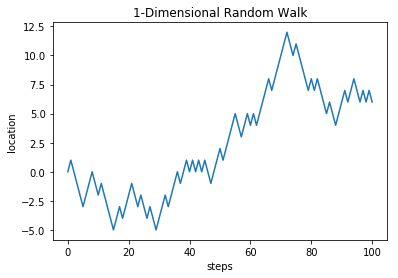

In [0]:
import matplotlib.pyplot as plt

plt.plot(locations)
plt.title("1-Dimensional Random Walk")
plt.xlabel("steps")
plt.ylabel("location");

We will need to generate a lot of random walks. To make this easy, write a function that returns a random walk. Here is the specification for your function:

**Function**: `randomWalk`

**Input**: number of steps

**Output**: a random walk, returned as a list of positions

In [0]:
def randomWalk(num_steps):
  locations = [0]
  for i in range(num_steps):
    move = random.choice([-1,1])
    locations.append(locations[-1] + move)
  return locations

## Diameter of a Random Walk

The **diameter** of a random walk is the difference between the maximum and minimum locations in the walk. 

Write a function that computes the diameter of a random walk. The input to your function should be a random walk (i.e., a list), and your function should return the diameter of the walk.

Note that Python has built-in functions `min` and `max` that return the minimum and maximum values in a list.

In [0]:
mywalk = randomWalk(1000)
diameter = max(mywalk) - min(mywalk)
diameter

48

In [0]:
def diameter(w):
  return (max(w) - min(w))

Compute the average diameter for a bunch of random walks, all with the same number of steps. (You might want to write a function to do this.)

In [0]:
def avgDiameter(numSteps, numWalks):
  diams = [diameter(randomWalk(numSteps)) for _ in range(numWalks)]
  return (sum(diams)/numWalks)

In [0]:
avgDiameter(1000,100)

52.37

**How does the diameter depend on the number of steps?**

Create a plot that shows the average diameter of a random walk as a function of the number of steps. Make a conjecture for the growth rate of the average diameter.

In [0]:
xvals = list(range(10,500,10))
avgDiams = [avgDiameter(n,1000) for n in xvals]

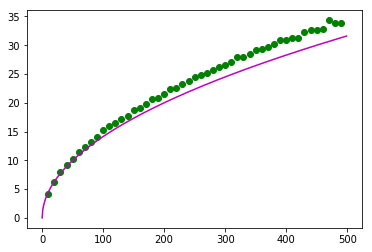

In [0]:
import math
plt.plot(xvals, avgDiams, 'go')
plt.plot([math.sqrt(2*n) for n in range(500)], 'm-');

## Number of Visits to Origin

How often does a random walk return to the origin? 

Count the number of times that the random walk returns to the origin in, say, the first 1000 steps. 

Note that Python lists have a `count` function that counts the number of occurrences of an item in the list. This function is a *method* of the Python list object, so it is accessed like this:

`list.count(x)`

where `x` is the item that you want to count in `list`.

In [0]:
mywalk = randomWalk(1000)
mywalk.count(0)

9

Simulate a bunch of random walks with the same number of steps. For each, count the number of times that it returns to the origin. Make a histogram of the counts.

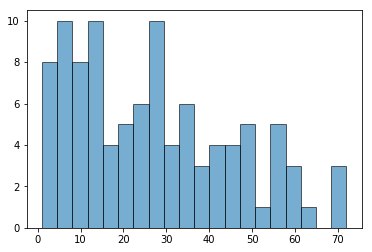

In [0]:
zeros = [randomWalk(1000).count(0) for _ in range(100)]
plt.hist(zeros, bins=20, alpha=0.6, linewidth=1, edgecolor='black');

**How does the number of visits to the origin depend on the number of steps?**

Create a plot that shows the average number of visits to the origin as a function of the number of steps. Make a conjecture for the growth rate of the average number of visits to the origin.

In [0]:
def avgZeros(numSteps, numWalks):
  zeros = [randomWalk(numSteps).count(0) for _ in range(numWalks)]
  return (sum(zeros)/numWalks)

In [0]:
xvals = list(range(10,100))
zeros = [avgZeros(n,1000) for n in xvals]

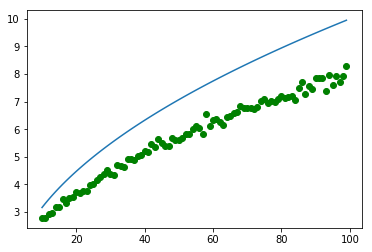

In [0]:
plt.plot(xvals, zeros, 'go');
plt.plot(xvals, [math.sqrt(n) for n in range(10,100)]);

## Distribution of Locations

How often does a random walk visit each position on the number line? Start your investigation by making histogram showing the distribution of positions in a random walk. Run your code several times to see histograms for different random walks, with various numbers of steps.

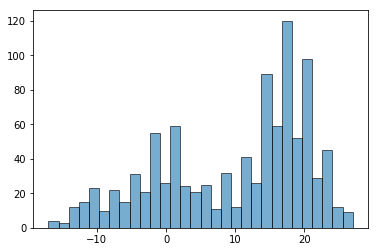

In [0]:
mywalk = randomWalk(1000)

plt.hist(mywalk, bins=30, alpha=0.6, linewidth=1, edgecolor='black');

Here is a histogram of the locations of a single random walk. Note that for finitely many steps of the walk, the distribution may be concentrated around a nonzero value, or it may have multiple modes.

Would the distribution be different if we combine the position lists from multiple random walks?

Generate many random walks and combine their positions into a single list. Then make a histogram of the values in this big list. Make a conjecture about what sort of distribution you find.

Note that in Python, the + operator concatenates lists.

In [0]:
mywalks = [randomWalk(1000) for _ in range(100)]

positions = []
for w in mywalks:
  positions += w

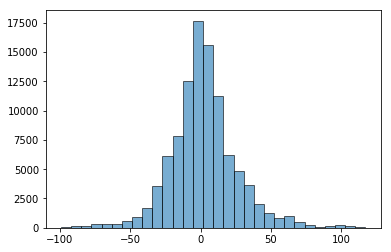

In [0]:
plt.hist(positions, bins=30, alpha=0.6, linewidth=1, edgecolor='black');

It looks approximately normal!

## Investigate your own questions!

What questions do you have about one-dimensional random walks? Investigate!

You could also try modifying the procedure for generating random walks. For example, instead of steps of +1 and -1 with equal probability, you could try some other way of producing random steps.